# Tugas Analisis Multimedia: **Image (Citra Digital)**

**Mata Kuliah:** Sistem & Teknologi Multimedia  
**Nama:** Deva Ahmad  
**NIM:** 122140015   

---

## Link Github
Link Repository Github, tekan [disini](https://github.com/earldev4/MULMED---Hands-On-Pemrosesan-Audio.git)

## Deskripsi Tugas

Tugas ini bertujuan untuk memahami **representasi dasar data citra digital (image)** melalui praktik langsung memuat data, visualisasi komponen warna, serta melakukan analisis spasial sederhana menggunakan berbagai teknik dasar pengolahan citra.

Anda akan bekerja dengan satu atau beberapa gambar (foto diri, objek, atau lingkungan sekitar) untuk:

* Mengamati struktur data piksel dan channel warna (RGB, Grayscale, HSV, dsb.)
* Menganalisis perbedaan hasil visualisasi antar representasi warna
* Melakukan eksplorasi sederhana terhadap transformasi citra (cropping, filtering, edge detection, dll.)
* Menyimpulkan pengaruh setiap tahap pemrosesan terhadap persepsi visual

Fokus tugas ini adalah pada **pemahaman konsep representasi spasial citra digital** dan **interpretasi hasil visualisasi**, **bukan** pada manipulasi kompleks atau penerapan model pembelajaran mesin.

### **Soal 1 — Cropping dan Konversi Warna**

* Ambil sebuah gambar diri Anda (*selfie*) menggunakan kamera atau smartphone.
* Lakukan **cropping secara manual** untuk menghasilkan dua potongan:

  * Cropping **kotak persegi pada area wajah**.
  * Cropping **persegi panjang pada area latar belakang**.
* Resize hasil crop menjadi **920×920 piksel**.
* Konversi gambar menjadi **grayscale** dan **HSV**, lalu tampilkan ketiganya berdampingan.
* Tambahkan **anotasi teks** berisi nama Anda di atas kepala pada gambar hasil crop.

  * Gaya teks (font, warna, posisi, ukuran, ketebalan) **dibebaskan**.
* Jelaskan efek **cropping** dan **perubahan warna** menggunakan **Markdown**.


### Persiapkan Semua Libraries

Instal dan import semua library yang dibutuhkan yaitu:
1. Numpy = Operasi numerik dan manipulasi array
2. Matplotlib = Untuk visualisasi gambar
3. Open CV = Library utama untuk pengolahan citra dan aplikasi terkait
4. OS = untuk operasi file dan path
5. pyzbar = Deteksi QR Code
6. DLIB = Untuk face detection dan facial landmark recognition

Pada terminal gunakan perintah = *pip install numpy matplotlib dlib  opencv-python pyzbar*

Setelah itu cek versi library yang digunakan sekaligus memastikan bahwa library sudah terinstal pada kode berikut:

In [2]:
#### Image Processing Exercise

#import necessary libraries

import numpy as np
import matplotlib.pyplot as plt  
import cv2  
import os  
import pyzbar  
from pyzbar.pyzbar import decode
import dlib

# Cek versi library yang diinstal
print(f"Versi numpy: {np.__version__}")
print(f"Versi matplotlib: {plt.matplotlib.__version__}")
print(f"Versi OpenCV: {cv2.__version__}")
print("Versi pyzbar:", pyzbar.__file__)
print("Versi dlib:", dlib.__file__)


Versi numpy: 2.2.6
Versi matplotlib: 3.10.7
Versi OpenCV: 4.12.0
Versi pyzbar: e:\Semester 7\MULMED\Minggu 11\.venv\Lib\site-packages\pyzbar\__init__.py
Versi dlib: e:\Semester 7\MULMED\Minggu 11\.venv\Lib\site-packages\dlib\__init__.py


### Load Gambar ###

Setelah memastikan bahwa Library sudah terpasang, berikutnya adalah memuat gambar yang akan digunakan.  
Berikut adalah kode untuk memuat dan menampilkan gambarnya:

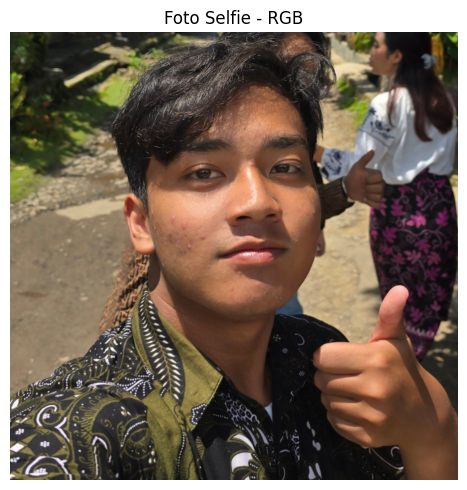

Gambar berhasil dimuat dan ditampilkan.
Dimensi gambar: (1935, 1935, 3)


In [3]:
# Path gambar
img_path = os.path.join(os.getcwd(), 'assets', 'foto_selfie.jpg')

# Baca gambar
img = cv2.imread(img_path)

# Konversi BGR → RGB
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Plot berdampingan
fig, axs = plt.subplots(1, 1, figsize=(15, 5))

axs.imshow(img_rgb)
axs.set_title('Foto Selfie - RGB')
axs.axis('off')

plt.tight_layout()
plt.show()

print("Gambar berhasil dimuat dan ditampilkan.")
print(f"Dimensi gambar: {img_rgb.shape}")

### Cropping secara Manual ###

Selanjutnya, crop gambar secara manual dengan menggunakan koordinat [y1:y2, x1:x2]  
dimana y1 adalah tinggi minimal dan y2 adalah tinggi maksimal gambar yang akan diambil (tengah2nya)  
dan x1 adalah lebar minimal dan x2 adalah lebar maksimal gambar yang akan diambil (tengah2nya)

Untuk mengcrop wajah, kita akan coba pada [400:1100, 600:1300] dimana x1 adalah 400, x2 adalah 1100, y1 adalah 600, dan y2 adalah 1300 (gambar persegi dengan rasio 1:1)
Kemudian untuk mengcrop latar belakang, kita akan coba pada [0:1200, 0:1900] dimana x1 adalah 0, x2 adalah 1200, y1 adalah 0, dan y2 adalah 1900 (gambar persegi panjang dengan ratio 12:19)

Berikut kode untuk crop gambar dan menampilkannya

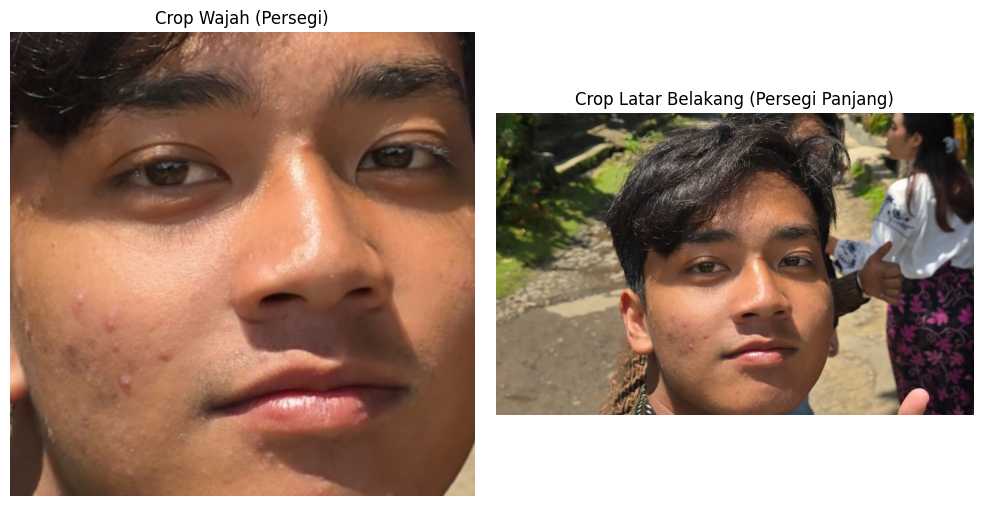

In [4]:
# crop wajah (kotak persegi)
crop_face = img_rgb[400:1100, 600:1300]

# crop latar belakang (persegi panjang)
crop_bg = img_rgb[0:1200, 0:1900]

# ---- Tampilkan hasil ----
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].imshow(crop_face)
axs[0].set_title("Crop Wajah (Persegi)")
axs[0].axis('off')

axs[1].imshow(crop_bg)
axs[1].set_title("Crop Latar Belakang (Persegi Panjang)")
axs[1].axis('off')

plt.tight_layout()
plt.show()

### Resizing Gambar & Konversi ke Grayscale dan HSV ###

Setelah melakukan crop, langkah selanjutnya adalah proses resizing (mengubah ukuran) gambar yang telah dicrop menjadi 920 x 920 piksel.
Kemudian mengubah masing2 gambar menjadi pewarnaan *Grayscale* dan HSV, serta menampilkan kedua gambar dan proses perubahannya pada plot canvas 2,3.  
Berikutnya adalah menampilkan annotasi teks yang menampilkan nama diatas kepala pada gambar yang sudah dicropping.

Berikut adalah kode resizing, konversi warna gambar dan menampilkan annotasi teks:

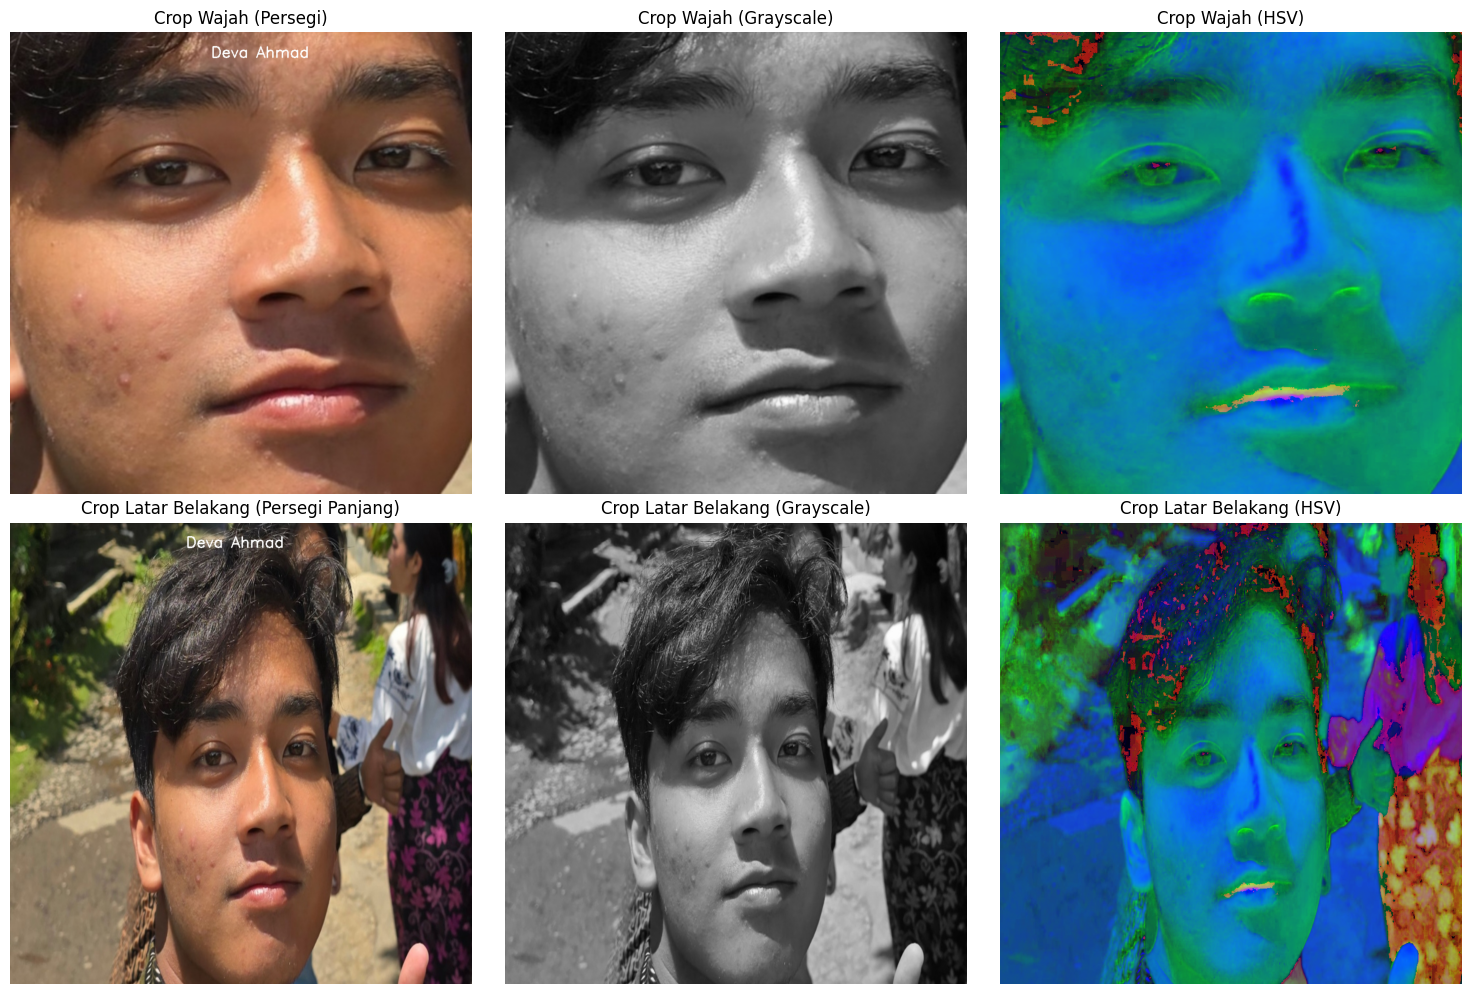

In [5]:
### Resizing Gambar ###

crop_resized_face = cv2.resize(crop_face, (920, 920))
crop_resized_bg = cv2.resize(crop_bg, (920, 920))

### Konversi ke Grayscale
crop_gray_face = cv2.cvtColor(crop_resized_face, cv2.COLOR_RGB2GRAY)
crop_gray_bg = cv2.cvtColor(crop_resized_bg, cv2.COLOR_RGB2GRAY)

### Konversi ke HSV
crop_hsv_face = cv2.cvtColor(crop_resized_face, cv2.COLOR_RGB2HSV)
crop_hsv_bg = cv2.cvtColor(crop_resized_bg, cv2.COLOR_RGB2HSV)

### Tambahkan annotasi teks
cv2.putText(crop_resized_face, "Deva Ahmad", (400, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)
cv2.putText(crop_resized_bg, "Deva Ahmad", (350, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)

### Tampilkan hasilnya
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

axs[0, 0].imshow(crop_resized_face)
axs[0, 0].set_title("Crop Wajah (Persegi)")
axs[0, 0].axis('off')

axs[0, 1].imshow(crop_gray_face, cmap='gray')
axs[0, 1].set_title("Crop Wajah (Grayscale)")
axs[0, 1].axis('off')

axs[0, 2].imshow(crop_hsv_face)
axs[0, 2].set_title("Crop Wajah (HSV)")
axs[0, 2].axis('off')

axs[1, 0].imshow(crop_resized_bg)
axs[1, 0].set_title("Crop Latar Belakang (Persegi Panjang)")
axs[1, 0].axis('off')

axs[1, 1].imshow(crop_gray_bg, cmap='gray')
axs[1, 1].set_title("Crop Latar Belakang (Grayscale)")
axs[1, 1].axis('off')

axs[1, 2].imshow(crop_hsv_bg)
axs[1, 2].set_title("Crop Latar Belakang (HSV)")
axs[1, 2].axis('off')

plt.tight_layout()
plt.show()

### Penjelasan ###

A. Cropping  
Untuk mengcrop wajah, kita akan coba pada [400:1100, 600:1300] dimana x1 adalah 400, x2 adalah 1100, y1 adalah 600, dan y2 adalah 1300 (gambar persegi dengan rasio 1:1)
Kemudian untuk mengcrop latar belakang, kita akan coba pada [0:1200, 0:1900] dimana x1 adalah 0, x2 adalah 1200, y1 adalah 0, dan y2 adalah 1900 (gambar persegi panjang dengan ratio 12:19). Hasil crop disimpan pada variabel baru dan ditampilkan variabel tersebut.

B. Resizing  
Default gambar yang dimuat berukuran 1935 x 1935 piksel. Resizing disini mengubah gambar menjadi 920 x 920 piksel dengan function OpenCV yaitu cv2.resize(img, (w x h))  
dimana img adalah variabel yang memuat gambar crop dan w x h adalah dimensi akhir gambar yang ingin diubah. 

C. Konversi ke Grayscale  
Warna default gambar yang telah dicrop adalah RGB, untuk mengubah ke warna grayscale gunakan function OpenCV yaitu cv2.cvtColor(img, cv2.COLOR_RGB2GRAY) dimana  
img adalah variabel yang memuat gambar crop dan cv2.COLOR_RGB2GRAY adalah konfigurasi untuk mengubah RGB ke Grayscale

D. Konversi ke HSV (Hue Saturation Value)  
Setelah mengubah gambar RGB ke Grayscale, perlu juga mengubah gambar dari RGB ke HSV. Gunakan function OpenCV yaitu cv2.cvtColor(img, cv2.COLOR_RGB2HSV) dimana  
img adalah variabel yang memuat gambar crop dan cv2.COLOR_RGB2HSV adalah konfigurasi untuk mengubah RGB ke HSV

E. Menambahkan annotasi teks pada gambar  
Pada gambar hasil crop yang, tambahkan annotasi teks berupa nama diatas kepala. Untuk menambahkan annotasi teks gunakan perintah cv2.putText(img, teks, (x, y), cv2.FONT_HERSHEY_SIMPLEX, 1, (R, G, B), 2) dimana img adalah variabel yang memuat gambar crop, teks adalah keterangan yang ingin ditampilkan, (x,y) adalah posisi teks sesuai posisi kepala,  cv2.FONT_HERSHEY_SIMPLEX adalah jenis font, 1 adalah ukuran font, (R,G,B) adalah settingang warna teks, dan 2 adalah ketebalan teks. 

### **Soal 2 — Manipulasi Channel Warna RGB**

* Gunakan gambar hasil crop dari Soal 1.
* Konversikan gambar ke ruang warna **RGB**.
* Lakukan manipulasi channel warna dengan cara:

  * **Naikkan intensitas channel merah sebanyak 50 poin** (maksimum 255).
  * **Turunkan intensitas channel biru sebanyak 30 poin** (minimum 0).
* Teknik atau cara menaikkan/menurunkan intensitas **dibebaskan**, asalkan logis dan hasilnya terlihat.
* Gabungkan kembali channel warna dan **simpan gambar hasil modifikasi dalam format `.png`**.
* **Tampilkan histogram per channel (R, G, B)** untuk gambar asli dan hasil modifikasi menggunakan `matplotlib.pyplot.hist`.
* Jelaskan dampak perubahan RGB pada warna gambar dalam sel **Markdown**.


### Konversi Gambar Crop ke RGB ###

Selanjutnya, pada gambar yang sudah di crop pada soal 1, kita akan mengubah warna gambar menjadi RGB. Tetapi langkah tersebut sudah dilakukan pada soal 1.  
Menggunakan function Open CV yaitu cv2.cvtColor(img, cv2.COLOR_BGR2RGB).

### Manipulasi Channel Warna ###

Kemudian, kita akan melakukan manipulasi warna gambar dengan menaikan channel R sebanyak 50 dan menurunkan channel B sebanyak 30. Pertama kita akan memecah  
RGB dari gambar dengan menggunakan function Open CV yaitu cv2.split(img). Berikutnya melakukan penambahan dengan menggunakan function Open CV yaitu cv2.add(warna, nilai)  
dan pengurangan yaitu cv2.subtract(warna, nilai). Setelah itu gabungkan kembali masing-masing channel warna dengan menggunakan function Open CV yaitu cv2.merge(r,g,b).  

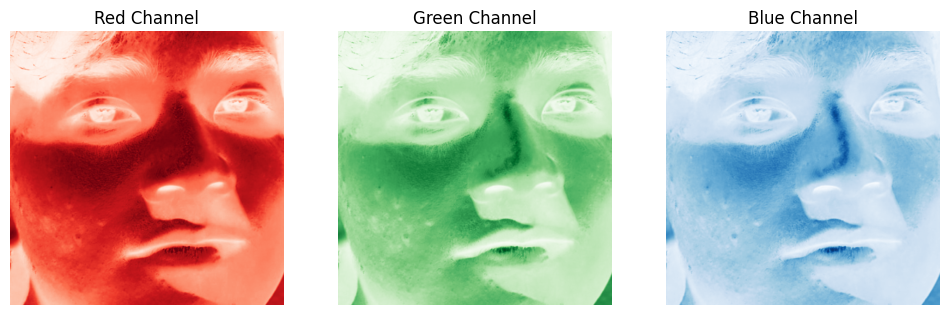

(np.float64(-0.5), np.float64(699.5), np.float64(699.5), np.float64(-0.5))

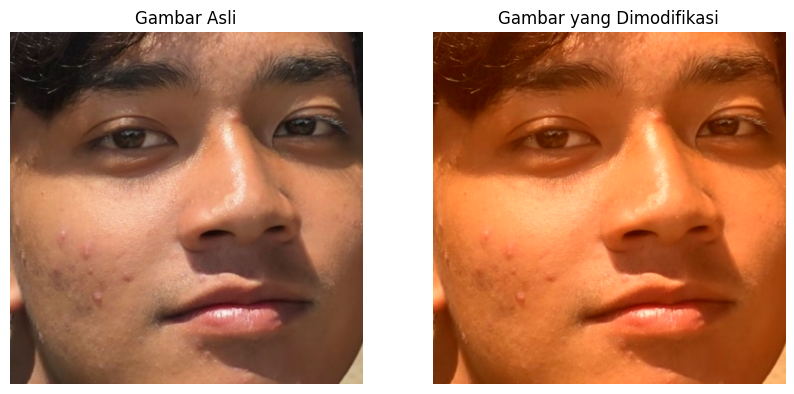

In [35]:
# Misal kamu sudah punya img_rgb (hasil dari cv2.cvtColor)
r, g, b = cv2.split(crop_face)

# Tampilkan tiap channel
plt.figure(figsize=(12,4))
plt.subplot(1,3,1); plt.imshow(r, cmap='Reds'); plt.title('Red Channel'); plt.axis('off')
plt.subplot(1,3,2); plt.imshow(g, cmap='Greens'); plt.title('Green Channel'); plt.axis('off')
plt.subplot(1,3,3); plt.imshow(b, cmap='Blues'); plt.title('Blue Channel'); plt.axis('off')
plt.show()

# Manipulasi Channel Warna
r_mod = cv2.add(r, 50)  # Menaikkan channel R sebanyak 50
b_mod = cv2.subtract(b, 30)  # Menurunkan channel B sebanyak 30

# Gabungkan channel yang sudah dimodifikasi kembali ke dalam gambar RGB
img_mod = cv2.merge((r_mod, g, b_mod))

# Tampilkan gambar asli dan gambar yang sudah dimodifikasi
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(crop_face)
axs[0].set_title('Gambar Asli')
axs[0].axis('off')
axs[1].imshow(img_mod)
axs[1].set_title('Gambar yang Dimodifikasi')
axs[1].axis('off')

### Simpan gambar kedalam format PNG ###

Setelah gambar berhasil dimanipulasi channel warna merah dan birunya, berikutnya adalah menyimpan gambar yang sudah dimanipulasi ke dalam folder *result* dalam format png.  
Untuk menyimpan gambar gunakan function Open CV yaitu cv2.imwrite(output_path, img). Tetapi sebelum itu jangan lupa mengubah kembali gambar kembali dalam bentuk BGR dengan  
function Open CV yaitu cv2.cvtColor(img, cv2.RGB2BGR). Berikut adalah kode menyimpan gambar: 

In [36]:
### Simpan gambar kedalam format PNG ###
output_path = os.path.join(os.getcwd(), 'results', 'crop_manipulated__face_image.png')
converted_back = cv2.cvtColor(img_mod, cv2.COLOR_RGB2BGR)
cv2.imwrite(output_path, converted_back)
print(f"Gambar berhasil disimpan di: {output_path}")

Gambar berhasil disimpan di: e:\Semester 7\MULMED\Minggu 11\.venv\results\crop_manipulated__face_image.png


### Tampilkan Histogram Per Channel ###

Setelah gambar berhasil disimpan, berikutnya adalah menampilkan Histogram per channel (R, G, B) untuk gambar asli dan gambar yang sudah dimanipulasi menggunakan matplotlib.pyplot.hist. Berikut adalah kode untuk menampilkan gambar: 

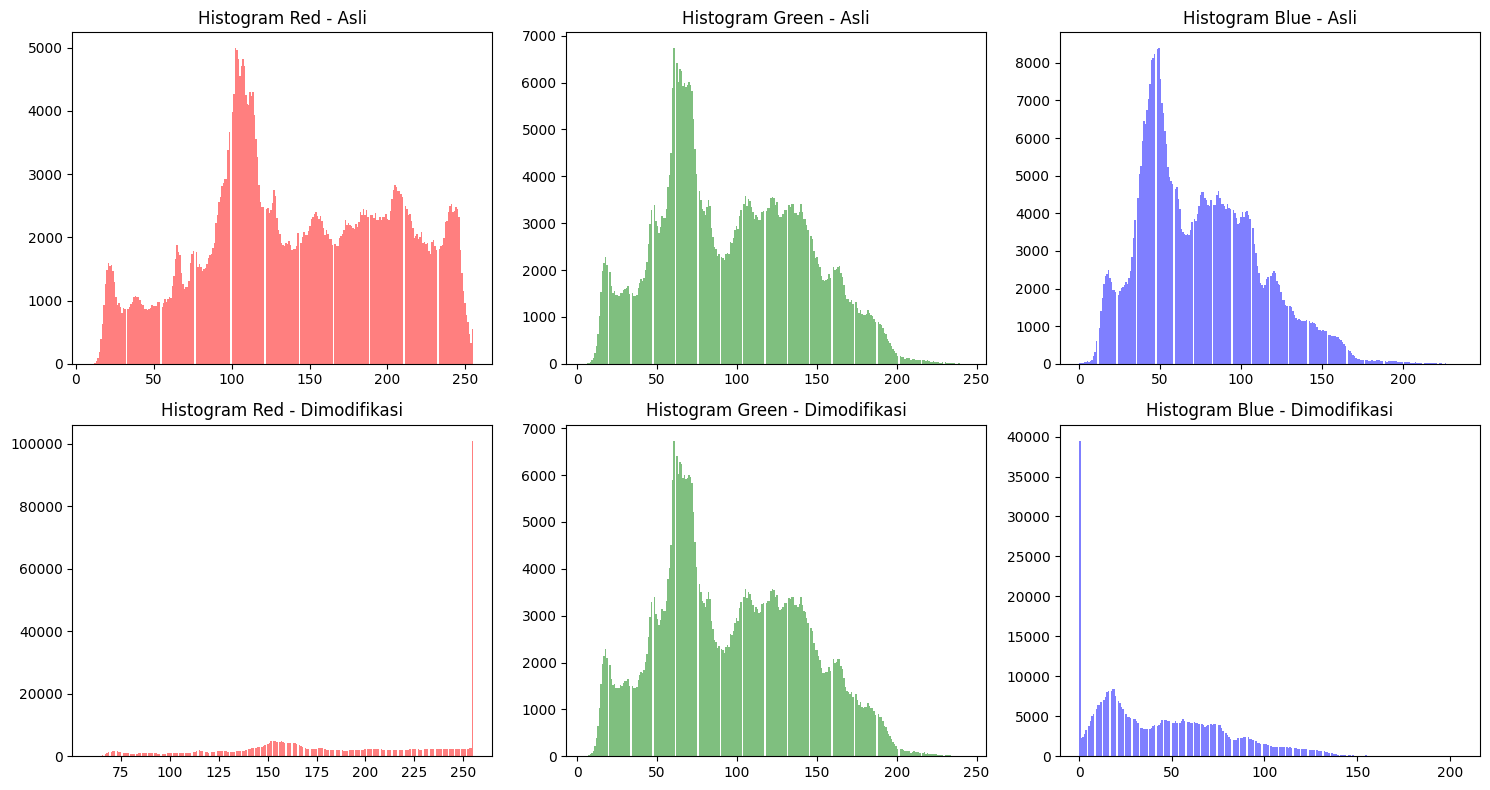

In [37]:
### Buat komponen per Channel untuk gambar asli ###
r_real, g_real, b_real = cv2.split(crop_face)
r_mod, g_mod, b_mod = cv2.split(img_mod)

### Tampilkan Histogram Per Channel ###
fig, axs = plt.subplots(2, 3, figsize=(15, 8))

# Histogram untuk gambar asli
axs[0, 0].hist(r_real.ravel(), bins=256, color='red', alpha=0.5)
axs[0, 0].set_title('Histogram Red - Asli')
axs[0, 1].hist(g_real.ravel(), bins=256, color='green', alpha=0.5)
axs[0, 1].set_title('Histogram Green - Asli')
axs[0, 2].hist(b_real.ravel(), bins=256, color='blue', alpha=0.5)
axs[0, 2].set_title('Histogram Blue - Asli')

# Histogram untuk gambar yang dimodifikasi
axs[1, 0].hist(r_mod.ravel(), bins=256, color='red', alpha=0.5)
axs[1, 0].set_title('Histogram Red - Dimodifikasi')
axs[1, 1].hist(g_mod.ravel(), bins=256, color='green', alpha=0.5)
axs[1, 1].set_title('Histogram Green - Dimodifikasi')
axs[1, 2].hist(b_mod.ravel(), bins=256, color='blue', alpha=0.5)
axs[1, 2].set_title('Histogram Blue - Dimodifikasi')

plt.tight_layout()
plt.show()

### Penjelasan ###

A. Color Adjusting  
Untuk melakukan manipulasi warna, kita perlu memecah 3 channel warna masing-masing kedalam variabel dengan menggunakan function Open CV yaitu cv2.split(), setelah displit, kemudian  
melakukan manipulasi intensitas warna dengan menggunakan cv2.add() untuk menambah nilai dan cv2.subtract() untuk mengurangi nilai. Setelah itu, gabungkan warna dengan menggunakan function cv2.merge(()).

B. Simpan Hasil  
Untuk menyimpan hasil gambar, sama seperti saat meload gambar, kita perlu memuat address tempat kita akan menyimpan gambar. Function yang digunakan adalah os.path.join(os.getcwd(), result_folder, result.jpg). Sebelum menyimpan gambar, kita perlu mengubah kembali warna gambar ke warna BGR karena jika tidak gambar yang disimpan akan tersimpan berwarna biru bukan merah. Gunakan function cv2.cvtColor(). Setelah dirubah warnanya kembali, simpan dengan function cv2.imwrite(output_path, img). 

C. Tampilkan Histogram  
Untuk menampilkan histogram warna perchannel dari gambar original dan gambar yang sudah di manipulasi, langkah pertama yaitu kembali mensplit gambar untuk mendapatkan ke tiga channel warna. Kemudian membuat plot dengan panjang 3 kolom dan lebar 2 baris. Kemudian pada masing-masing channel tampilkan histogram dengan function matplotlib.pyplot.hist() dan menampilkan dengan function matplotlib.pyplot.set_title().

Analisis

Pada warna merah di gambar original, persebaran warna cukup fluktuatif dengan persebaran warna intensitas 100 sampai 125 paling banyak yaitu mencapai 5000 titik. Sedangkan pada intensitas warna 250 keatas persebaran warha hanya sekitar 500 titik. Namun pada warna merah di gambar modifikasi, pertambahan intensitas 50 menyebabkan persebaran nilai di tengah yaitu 100 - 200 sangat berkurang, akibatnya gambar menjadi kemerahan. Pada ujung kanan atau intensitas 250 keatas, persebaran titik menyentuh angka tertinggi yaitu 100 ribu.

Pada warna biru di gambar original, persebaran warna cukup fluktuatif dengan persebaran warna intensitas 30 sampai 70 memiliki rentang titik banyak dengan intensitas 50 memiliki titik terbanyak yaitu lebih dari 8000. Sedangkan pada intensitas warna 200 keatas persebaran warna sangat dikit, mungkin kurang dari 100 titik. Namun pada warna biru di gambar modifikasi, pengurangan intensitas 30 menyebabkan persebaran nilai di tengah yaitu 100 - 200 sangat berkurang. Pada ujung kiri atau intensitas 0 memiliki persebaran warna tertinggi yaitu mencapai lebih dari 35000.

### **Soal 3 — Deteksi Tepi dan Filter Citra**

* Ambil gambar **objek dengan background bertekstur** (misalnya kain bermotif, jerami, atau batu).
* Terapkan **edge detection (Canny)** dan tampilkan hasilnya.
* Lakukan **thresholding dengan nilai ambang tertentu** (bebas Anda tentukan) agar hanya objek utama yang tersisa.
* Buat **bounding box** di sekitar objek hasil segmentasi (boleh manual atau otomatis).
* Terapkan **filter blur** dan **filter sharpening**, lalu **bandingkan hasil keduanya**.
* Jelaskan bagaimana setiap filter memengaruhi detail gambar dalam format **Markdown**.


### Memuat Gambar Objek Background Bertekstur ###

Pada tahap ini, kita perlu memuat gambar yang dibutuhkan, yaitu gambar objek background bertekstur. Gunakan function library OS untuk mencari  
path/address dari gambar. Setelah itu gunakan library Open CV yaitu cv2.imread(img_path) untuk membaca alamat dan mengambil gambar. Ubah gambar yang default dimuat dengan warna BGR oleh library Open CV kepada RGB dan kemudian tampilkan gambar. Berikut adalah kode dan gambar yang dimuat: 

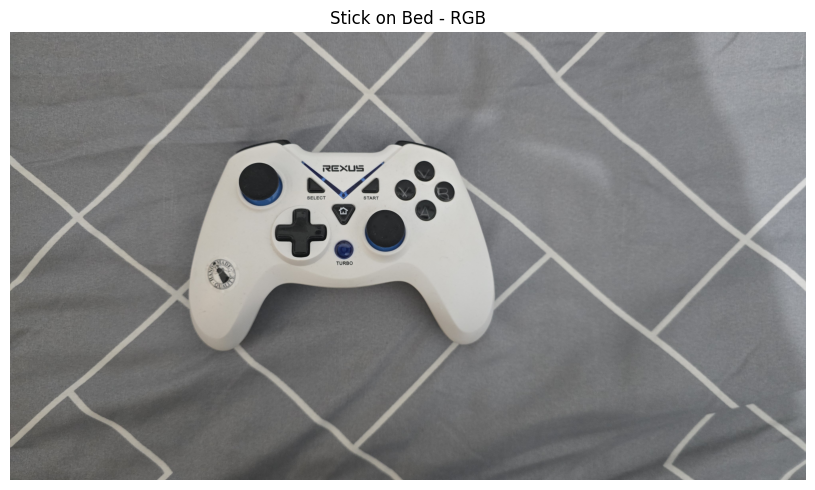

Gambar berhasil dimuat dan ditampilkan.
Dimensi gambar: (2252, 4000, 3)


In [7]:
# Path gambar
img_path_2 = os.path.join(os.getcwd(), 'assets', 'stick_on_bed.jpg')

# Baca gambar
img_stick = cv2.imread(img_path_2)

# Konversi BGR → RGB
img_stick_rgb = cv2.cvtColor(img_stick, cv2.COLOR_BGR2RGB)

# Plot berdampingan
fig, axs = plt.subplots(1, 1, figsize=(15, 5))

axs.imshow(img_stick_rgb)
axs.set_title('Stick on Bed - RGB')
axs.axis('off')

plt.tight_layout()
plt.show()

print("Gambar berhasil dimuat dan ditampilkan.")
print(f"Dimensi gambar: {img_stick_rgb.shape}")

### Menerapkan Edge Detection (Canny) ###

Berikutnya, kita akan menerapkan algoritma Canny Edge Detector untuk mendeteksi tepi gambar. Sebelum itu kita perlu melakukan Blurring untuk mengurangi noise pada gambar. Gunakan function library Open CV yaitu cv2.GaussianBlur(img,(15,15),0). Kemudian Gunakan library Open CV yaitu cv2.Canny(img, 100, 200) untuk melakukan deteksi tepi gambar. Berikut adalah kodenya:

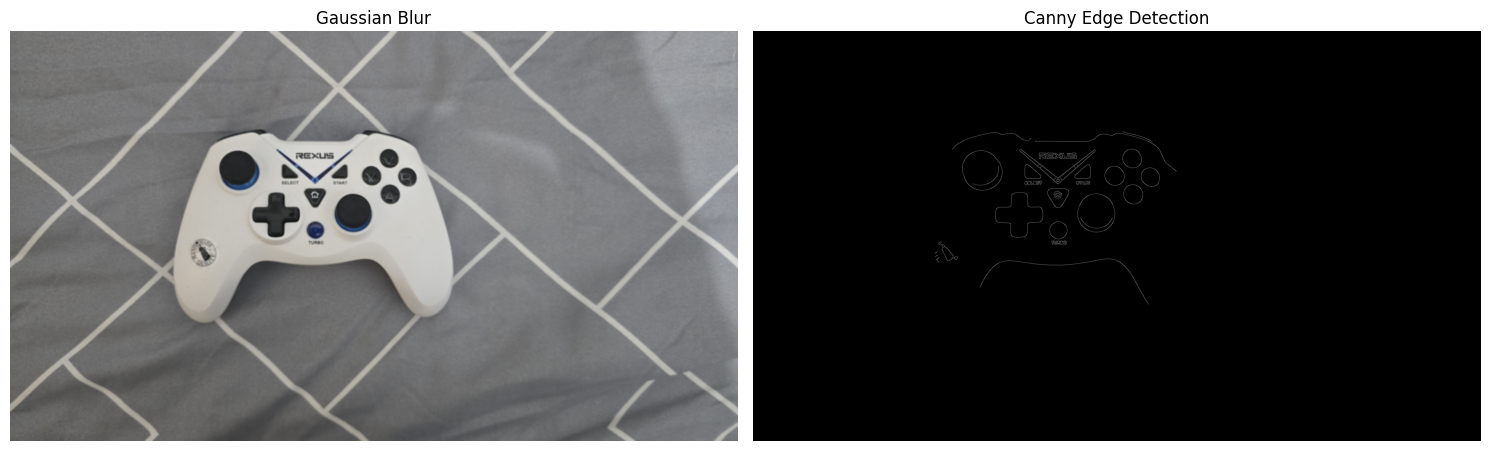

In [34]:
#### Menerapkan Edge Detection (Canny) ####
# Terapkan Gaussian Blur untuk mengurangi noise
blurred_img = cv2.GaussianBlur(img_stick, (15, 15), 0)
blurred_img_rgb = cv2.cvtColor(blurred_img, cv2.COLOR_BGR2RGB)

# Terapkan Canny Edge Detection
edges = cv2.Canny(blurred_img, 40, 130)
edges_rgb = cv2.cvtColor(edges, cv2.COLOR_BGR2RGB)

# Plot berdampingan
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

axs[0].imshow(blurred_img_rgb)
axs[0].set_title('Gaussian Blur')
axs[0].axis('off')

axs[1].imshow(edges_rgb)
axs[1].set_title('Canny Edge Detection')
axs[1].axis('off')

plt.tight_layout()
plt.show()

### Membuat Bounding Box ### 

Selanjutnya adalah membuat Bounding Box disekitar objek hasil segmentasi. Sebelum itu kita akan menggunakan function cv2.findContours() untuk mendeteksi hanya kontur luar dari gambar. Berikut adalah kodenya:

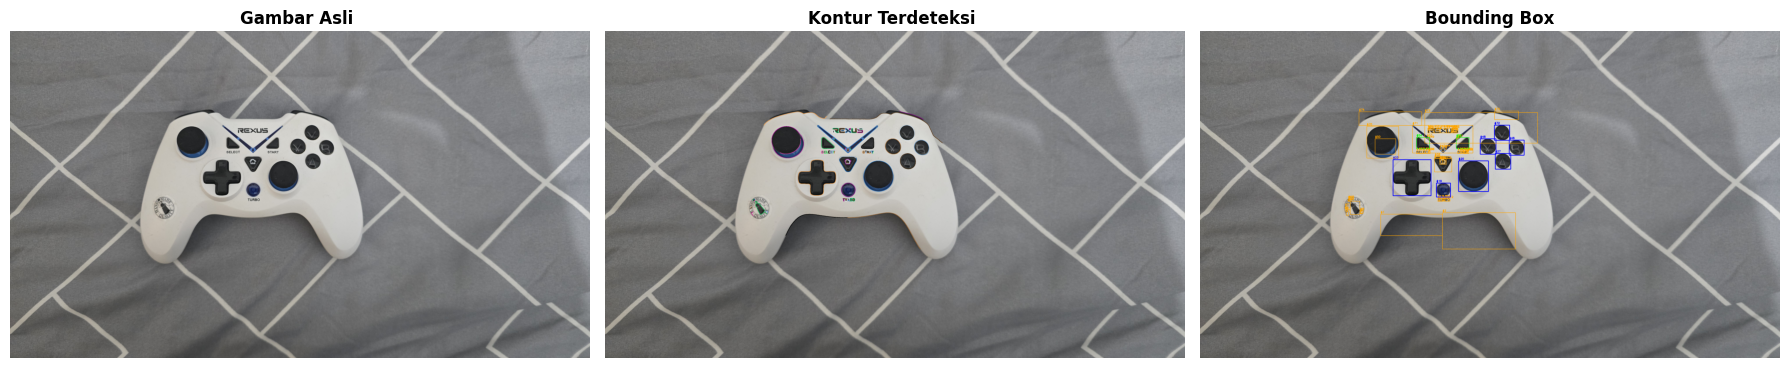

In [36]:
# Deteksi kontur menggunakan cv2.findContours pada img1
contours_img1, hierarchy_img1 = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Gambar 1: Kontur dengan warna berbeda
img1_contours = img_stick.copy()
for idx, c in enumerate(contours_img1):
    # Warna berbeda untuk tiap objek
    color = (
        int((idx * 50) % 255),
        int((idx * 100) % 255),
        int((idx * 150) % 255)
    )
    cv2.drawContours(img1_contours, [c], -1, color, 2)

# Gambar 2: Bounding Box
img1_boxes = img_stick.copy()
for idx, c in enumerate(contours_img1):
    # Hitung bounding box
    x, y, w, h = cv2.boundingRect(c)
    area = cv2.contourArea(c)
    
    # Warna berdasarkan ukuran
    if area > 5000:
        color = (255, 0, 0)  # Biru untuk objek besar
        thickness = 3
    elif area > 2000:
        color = (0, 255, 0)  # Hijau untuk objek sedang
        thickness = 2
    else:
        color = (0, 165, 255)  # Orange untuk objek kecil
        thickness = 2
    
    # Gambar rectangle
    cv2.rectangle(img1_boxes, (x, y), (x + w, y + h), color, thickness)
    
    # Tambahkan label
    label = f"#{idx+1}"
    cv2.putText(img1_boxes, label, (x, y-8), 
                cv2.FONT_HERSHEY_SIMPLEX, 0.6, color, 2)

# Visualisasi hasil
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

axes[0].imshow(cv2.cvtColor(img_stick, cv2.COLOR_BGR2RGB))
axes[0].set_title("Gambar Asli ", fontsize=12, fontweight='bold')
axes[0].axis("off")

axes[1].imshow(cv2.cvtColor(img1_contours, cv2.COLOR_BGR2RGB))
axes[1].set_title("Kontur Terdeteksi ", fontsize=12, fontweight='bold')
axes[1].axis("off")

axes[2].imshow(cv2.cvtColor(img1_boxes, cv2.COLOR_BGR2RGB))
axes[2].set_title("Bounding Box", fontsize=12, fontweight='bold')
axes[2].axis("off")

plt.tight_layout()
plt.show()

### Penjelasan ###

A. Menerapkan Algoritma Edge Canny Detection  
Pada tahap ini, kita menerapkan algoritma Canny Edge Detector untuk mendeteksi tepi gambar. Sebelum itu kita perlu melakukan Blurring untuk mengurangi noise pada gambar. Gunakan function library Open CV yaitu cv2.GaussianBlur(img,(15,15),0). Kemudian Gunakan library Open CV yaitu cv2.Canny(img, 100, 200) untuk melakukan deteksi tepi gambar.

B. Membuat Bounding Box  
Pada tahap ini, kita lakukan proses pendeteksian kontur dan pembuatan bounding box pada hasil segmentasi gambar menggunakan library Open CV. Langkah pertama yaitu menerapkan function cv2.findContours() untuk mendeteksi kontur dari hasil deteksi tepi sebelumnya. Setiap kontur yang ditemukan kemudian digambarkan pada salinan gambar asli menggunakan function cv2.drawContours(). Untuk membedakan antara satu objek dengan yang lain, setiap kontur diberi warna yang berbeda berdasarkan indeksnya. Kemudian, pada setiap kontur yang terdeteksi, dihitung nilai koordinat dan dimensi bounding box menggunakan fungsi cv2.boundingRect(). 

Analisis  
Pada gambar asli terlihat bentuk stick yang masih utuh tanpa anotasi, memperlihatkan tampilan fisik dan detail tombol dengan jelas. Gambar ini digunakan sebagai acuan sebelum dilakukan proses pendeteksian tepi, kontur, dan pembentukan bounding box.  

Pada gambar kiri menunjukkan hasil penerapan pendeteksian kontur menggunakan fungsi cv2.findContours(). Pada tahap ini, setiap tepi objek pada stik terdeteksi cukup baik. Kontur yang terbentuk mengikuti bentuk asli dari tiap elemen pada permukaan gamepad. Warna kontur yang berbeda-beda pada setiap objek menggambarkan hasil segmentasi yang memisahkan masing-masing komponen berdasarkan tepi hasil deteksi Canny.  

Sementara itu, pada bagian kanan ditampilkan hasil dari penerapan bounding box menggunakan fungsi cv2.boundingRect(). Pada gambar tersebut, setiap tombol dan elemen penting pada gamepad dibungkus dengan persegi berwarna yang menandakan batas area objek. Warna kotak berbeda digunakan untuk mengklasifikasikan ukuran objek.    



### **Soal 4 — Deteksi Wajah dan Filter Digital Kreatif**

* Ambil gambar diri Anda dengan ekspresi wajah **netral**.
* Lakukan **deteksi wajah dan landmark** menggunakan salah satu dari:

  * **MediaPipe**, atau
  * **Dlib**, atau
  * **OpenCV**.
* Buat **overlay filter digital kreatif** karya Anda sendiri, misalnya:

  * topi, kumis, masker, helm, aksesoris, atau bentuk unik lainnya.
  * Filter boleh dibuat dari **gambar eksternal (PNG)** *atau* digambar langsung (misal bentuk lingkaran, garis, poligon, dll).
* Pastikan posisi overlay menyesuaikan **landmark wajah** dengan logis.
* **Gunakan alpha blending sebagai saran** agar hasil tampak lebih natural.
* Tampilkan perbandingan antara **gambar asli** dan **hasil dengan filter**.
* Jelaskan bagaimana Anda menghitung posisi overlay dan tantangan yang dihadapi selama implementasi (gunakan **Markdown**).

### Memuat Gambar Foto Selfie ###

Pada tahap ini, kita perlu memuat gambar yang dibutuhkan, yaitu gambar Foto Selfie. Gunakan function library OS untuk mencari  
path/address dari gambar. Setelah itu gunakan library Open CV yaitu cv2.imread(img_path) untuk membaca alamat dan mengambil gambar. Ubah gambar yang default dimuat dengan warna BGR oleh library Open CV kepada RGB dan kemudian tampilkan gambar. Berikut adalah kode dan gambar yang dimuat: 

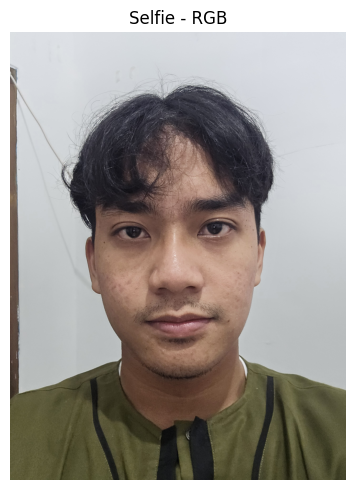

Gambar berhasil dimuat dan ditampilkan.
Dimensi gambar: (3392, 2544, 3)


In [37]:
# Path gambar
img_path_3 = os.path.join(os.getcwd(), 'assets', 'selfie_foto.jpg')

# Baca gambar
img_selfie = cv2.imread(img_path_3)

# Konversi BGR → RGB
img_selfie_rgb = cv2.cvtColor(img_selfie, cv2.COLOR_BGR2RGB)

# Plot berdampingan
fig, axs = plt.subplots(1, 1, figsize=(15, 5))

axs.imshow(img_selfie_rgb)
axs.set_title('Selfie - RGB')
axs.axis('off')

plt.tight_layout()
plt.show()

print("Gambar berhasil dimuat dan ditampilkan.")
print(f"Dimensi gambar: {img_selfie_rgb.shape}")

### Mendeteksi Wajah dan Landmark ###
Kita akan melakukan pendeteksian wajah dan landmark menggunakan library DLIB. Pertama kita inisialisasi dlib untuk face detector dan landmark predictor menggunakan function get_frontal_face_detector(). Setelah itu kita perlu membuat predictor_path seperti biasa menggunakan function os.path.join() dan cari file *shape_predictor_g8_face_landmarks.dat*. File itu bisa didownload di [Sini](https://huggingface.co/spaces/asdasdasdasd/Face-forgery-detection/blob/ccfc24642e0210d4d885bc7b3dbc9a68ed948ad6/shape_predictor_68_face_landmarks.dat). Setelah itu gunakan function shape_predictor untuk membaca predictor-path.

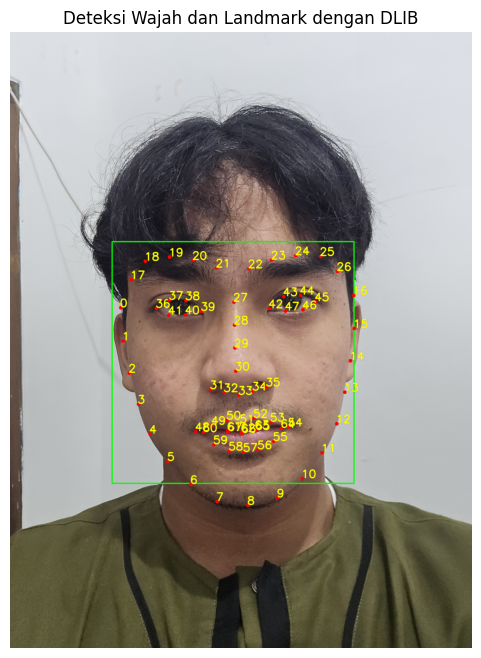

In [56]:
# Inisialisasi detektor wajah dan predictor landmark
detector = dlib.get_frontal_face_detector()
predictor_path = os.path.join(os.getcwd(), 'assets', 'shape_predictor_68_face_landmarks.dat')
predictor = dlib.shape_predictor(predictor_path)

# Baca gambar
foto_path = os.path.join(os.getcwd(), 'assets', 'selfie_foto.jpg')
foto = cv2.imread(foto_path)

gray = cv2.cvtColor(foto, cv2.COLOR_BGR2GRAY)
faces = detector(gray)

# ---- skala agar ukuran titik & teks menyesuaikan resolusi gambar ----
h, w = foto.shape[:2]
scale = max(1.0, w / 500.0)        # kalau gambar lebar 1000 px, scale=2

radius   = int(2 * scale)          # radius titik landmark
font     = cv2.FONT_HERSHEY_SIMPLEX
fscale   = 0.4 * scale             # ukuran font angka
thick    = max(1, int(1 * scale))  # ketebalan garis

for face in faces:
    x1, y1 = face.left(), face.top()
    x2, y2 = face.right(), face.bottom()
    cv2.rectangle(foto, (x1, y1), (x2, y2), (0, 255, 0), thick)

    landmarks = predictor(gray, face)
    for i in range(0, 68):
        x = landmarks.part(i).x
        y = landmarks.part(i).y

        # Titik landmark (lebih besar dan jelas)
        cv2.circle(foto, (x, y), radius, (0, 0, 255), -1)

        # Teks dengan outline hitam supaya tetap kebaca di kulit terang
        # Bayangan hitam
        cv2.putText(foto, str(i), (x - 5, y - 5), font,
                    fscale, (0, 0, 0), thick + 1, cv2.LINE_AA)
        # Teks kuning di atas bayangan
        cv2.putText(foto, str(i), (x - 5, y - 5), font,
                    fscale, (0, 255, 255), thick, cv2.LINE_AA)

# Konversi BGR -> RGB untuk matplotlib
img_rgb = cv2.cvtColor(foto, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(6, 8))
plt.imshow(img_rgb)
plt.axis("off")
plt.title("Deteksi Wajah dan Landmark dengan DLIB")
plt.show()


### Membuat Overlay Filter Digital ###

Disini kita akan membuat filter yaitu masker mulut dengan lebar masker yaitu jarak rahang kiri (poin 3) ke rahang kanan (poin 13) dengan tinggi masker sesuai rasio gambar dan titik tengah masker harus berada di hidung (poin 30) dan dagu (poin 8). Berikut adalah kodenya:

ROI: (901, 1251, 3) Overlay: (901, 1251, 3)


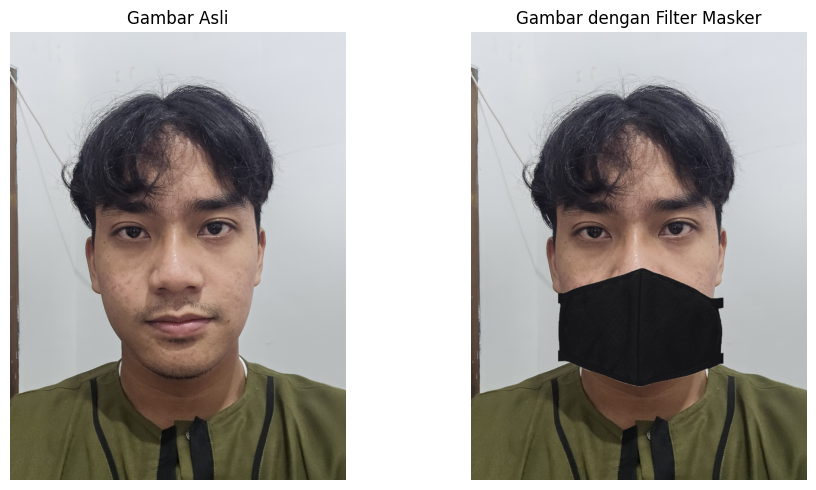

In [57]:
detector = dlib.get_frontal_face_detector()
predictor_path = os.path.join(os.getcwd(), 'assets', 'shape_predictor_68_face_landmarks.dat')
predictor = dlib.shape_predictor(predictor_path)

# === 2. Baca gambar asli dan filter PNG ===
foto_path = os.path.join(os.getcwd(), 'assets', 'selfie_foto.jpg')
mask_path = os.path.join(os.getcwd(), 'assets', 'masker.png')

img = cv2.imread(foto_path)
overlay_png = cv2.imread(mask_path, cv2.IMREAD_UNCHANGED)  # RGBA

if img is None:
    raise ValueError("Gambar selfie tidak ditemukan.")
if overlay_png is None or overlay_png.shape[2] != 4:
    raise ValueError("Gambar masker tidak ditemukan / tidak punya alpha channel.")

img_original = img.copy()  # untuk perbandingan

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
faces = detector(gray)

if len(faces) == 0:
    raise ValueError("Tidak ada wajah terdeteksi.")

# Ambil wajah pertama
face = faces[0]
landmarks = predictor(gray, face)

# === 3. Hitung posisi & ukuran masker dari landmark ===
jaw_left  = np.array([landmarks.part(3).x,  landmarks.part(3).y])
jaw_right = np.array([landmarks.part(13).x, landmarks.part(13).y])
jaw_width = np.linalg.norm(jaw_right - jaw_left)

# hidung & dagu
nose = np.array([landmarks.part(33).x, landmarks.part(30).y])  # <- perbaikan
chin = np.array([landmarks.part(8).x,  landmarks.part(8).y])
center = (nose + chin) / 2.0

# ukuran “ideal” masker (sebelum di-clip)
mask_width  = int(1.1 * jaw_width)
h_overlay, w_overlay = overlay_png.shape[:2]
aspect = h_overlay / w_overlay
mask_height = int(mask_width * aspect)

# === 4. Hitung ROI di gambar utama ===
cx, cy = int(center[0]), int(center[1])
x1 = cx - mask_width // 2
y1 = cy - mask_height // 2
x2 = x1 + mask_width
y2 = y1 + mask_height

h_img, w_img = img.shape[:2]

# clip agar tetap di dalam gambar
x1_clip = max(x1, 0)
y1_clip = max(y1, 0)
x2_clip = min(x2, w_img)
y2_clip = min(y2, h_img)

# ukuran ROI setelah clip
roi_w = x2_clip - x1_clip
roi_h = y2_clip - y1_clip

# === 5. Resize overlay LANGSUNG ke ukuran ROI ===
overlay_resized = cv2.resize(overlay_png, (roi_w, roi_h), interpolation=cv2.INTER_AREA)
overlay_color = overlay_resized[:, :, :3]
overlay_alpha = overlay_resized[:, :, 3] / 255.0  # 0–1

roi = img[y1_clip:y2_clip, x1_clip:x2_clip]

# Di sini pasti sama ukurannya
print("ROI:", roi.shape, "Overlay:", overlay_color.shape)

# === 6. Alpha blending ===
alpha = overlay_alpha[..., np.newaxis]  # (h, w, 1)
roi_result = (alpha * overlay_color + (1 - alpha) * roi).astype(np.uint8)
img[y1_clip:y2_clip, x1_clip:x2_clip] = roi_result

# === 7. Tampilkan perbandingan asli vs hasil filter ===
img_original_rgb = cv2.cvtColor(img_original, cv2.COLOR_BGR2RGB)
img_filter_rgb   = cv2.cvtColor(img,          cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img_original_rgb)
plt.title("Gambar Asli")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(img_filter_rgb)
plt.title("Gambar dengan Filter Masker")
plt.axis("off")

plt.tight_layout()
plt.show()


### Penjelasan ###

A. Mendeteksi Wajah dan Landmark  
Pada tahap ini, kita melakukan pendeteksian wajah dan landmark menggunakan library DLIB. Pertama kita inisialisasi dlib untuk face detector dan landmark predictor menggunakan function get_frontal_face_detector(). Setelah itu kita perlu membuat predictor_path seperti biasa menggunakan function os.path.join() dan cari file *shape_predictor_g8_face_landmarks.dat*. Setelah itu menggunakan function shape_predictor untuk membaca predictor-path.

B. Membuat Overlay Filter Digital  
Pada tahap ini kita akan membuat filter yaitu masker mulut dengan lebar masker yaitu jarak rahang kiri (poin 3) ke rahang kanan (poin 13) dengan tinggi masker sesuai rasio gambar dan titik tengah masker harus berada di hidung (poin 30) dan dagu (poin 8).

Analisis  
Pada tampilan gambar pertama ditampilkan hasil deteksi wajah dan landmark menggunakan library dlib. Program terlebih dahulu membaca foto selfie. kemudian mengonversinya ke grayscale agar proses deteksi wajah lebih efisien. Dengan function get_frontal_face_detector(), kita dapat menemukan posisi wajah dan menggambarkan bounding box yang mengapit area wajah. Setelah wajah terdeteksi, model shape_predictor_68_face_landmarks.dat digunakan untuk memetakan 68 titik fitur penting pada wajah. Setiap titik landmark diberi lingkaran merah dengan ukuran yang menyesuaikan resolusi gambar, serta diberi nomor indeks berwarna kuning yang dikelilingi outline hitam sehingga tetap terbaca di atas warna kulit.  

Pada tampilan kedua diperlihatkan perbandingan antara gambar asli dan gambar yang telah diberi overlay filter masker digital. Lebar masker diturunkan dari jarak antara titik rahang kiri dan kanan (landmark 3 dan 13), sedangkan posisi vertikalnya dipusatkan di tengah antara hidung (landmark 30) dan dagu (landmark 8). Setelah itu, dilakukan proses alpha blending, yaitu menggabungkan warna masker dan warna piksel wajah dengan mempertimbangkan nilai transparansi setiap piksel masker. Hasilnya, pada gambar kanan terlihat seolah-olah memakai masker yang menyatu. 

### **Soal 5 — Perspektif dan Peningkatan Kualitas Citra**

* Ambil gambar **objek datar** seperti karya tangan di kertas, tulisan di papan tulis, atau foto produk di meja dengan kondisi pencahayaan atau sudut yang tidak ideal.
* Lakukan **preprocessing** untuk memperbaiki tampilan agar lebih rapi dan jelas, dengan langkah-langkah:

  * Konversi ke **grayscale**.
  * **Koreksi perspektif (transformasi homografi)** menggunakan **4 titik manual** agar objek terlihat sejajar dan tidak terdistorsi.
  * Terapkan **thresholding adaptif atau Otsu** (pilih salah satu, dan jelaskan alasan pilihan Anda).
* Tampilkan **setiap tahap pemrosesan dalam satu grid** agar mudah dibandingkan.
* Jelaskan fungsi masing-masing tahap dan bagaimana teknik ini meningkatkan kualitas visual citra (gunakan **Markdown**).

### Memuat Gambar Foto kertas ###

Pada tahap ini, kita perlu memuat gambar yang dibutuhkan, yaitu gambar Foto kertas diatas lantai. Gunakan function library OS untuk mencari  
path/address dari gambar. Setelah itu gunakan library Open CV yaitu cv2.imread(img_path) untuk membaca alamat dan mengambil gambar. Ubah gambar yang default dimuat dengan warna BGR oleh library Open CV kepada RGB dan kemudian tampilkan gambar. Berikut adalah kode dan gambar yang dimuat: 

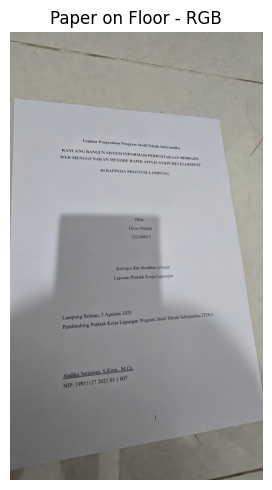

Gambar berhasil dimuat dan ditampilkan.
Dimensi gambar: (4000, 2252, 3)


In [68]:
# Path gambar
img_path_3 = os.path.join(os.getcwd(), 'assets', 'paper_on_floor.jpg')

# Baca gambar
img_paper = cv2.imread(img_path_3)

# Konversi BGR → RGB
img_paper_rgb = cv2.cvtColor(img_paper, cv2.COLOR_BGR2RGB)

# Plot berdampingan
fig, axs = plt.subplots(1, 1, figsize=(15, 5))

axs.imshow(img_paper_rgb)
axs.set_title('Paper on Floor - RGB')
axs.axis('off')

plt.tight_layout()
plt.show()

print("Gambar berhasil dimuat dan ditampilkan.")
print(f"Dimensi gambar: {img_paper_rgb.shape}")

### Preprocessing ###
Selanjutnya, kita akan melakukan tahap preprocessing, dimulai dari mengonversi gambar menjadi grayscale. Kemudian mengoreksi perspektif (transformasi homografi) menggunakan 4 titik manual supaya objek menjadi sejajar dan tidak terdistorsi. Berikut adalah kodenya:

In [74]:
# 1. Konversi BGR → RGB untuk tampilan
img_paper_rgb = cv2.cvtColor(img_paper, cv2.COLOR_BGR2RGB)

# 2. Grayscale
gray = cv2.cvtColor(img_paper, cv2.COLOR_BGR2GRAY)

# 3. Titik sumber utk homografi
h, w = img_paper.shape[:2]
src_points = np.float32([
    [w * 0.08, h * 0.15],    # kiri atas
    [w * 0.92, h * 0.12],    # kanan atas
    [w * 0.85, h * 0.85],    # kanan bawah
    [w * 0.12, h * 0.88]     # kiri bawah
])

width, height = 600, 850
pts_dst = np.float32([
    [0, 0],
    [width-1, 0],
    [width-1, height-1],
    [0, height-1]
])

matriks = cv2.getPerspectiveTransform(src_points, pts_dst)
paper_warped = cv2.warpPerspective(img_paper, matriks, (width, height))

# warp grayscale
paper_warped_gray = cv2.warpPerspective(gray, matriks, (width, height))

# gambar titik + garis di citra asli (BGR → RGB kalau mau ditampilkan)
paper_with_points = img_paper.copy()
for i, point in enumerate(src_points):
    cv2.circle(paper_with_points, (int(point[0]), int(point[1])), 10, (0, 255, 0), -1)
    cv2.putText(paper_with_points, str(i+1), (int(point[0]) + 10, int(point[1]) - 10),
                cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 3)

cv2.polylines(paper_with_points, [np.int32(src_points)], isClosed=True, color=(0, 255, 0), thickness=3)

array([[[140, 153, 155],
        [141, 154, 156],
        [142, 155, 157],
        ...,
        [116, 121, 124],
        [112, 117, 120],
        [100, 105, 108]],

       [[133, 146, 148],
        [135, 148, 150],
        [137, 150, 152],
        ...,
        [117, 122, 125],
        [113, 118, 121],
        [107, 112, 115]],

       [[135, 148, 150],
        [135, 148, 150],
        [135, 148, 150],
        ...,
        [119, 124, 127],
        [117, 122, 125],
        [116, 121, 124]],

       ...,

       [[ 67,  70,  78],
        [ 63,  66,  74],
        [ 60,  63,  71],
        ...,
        [122, 131, 134],
        [122, 131, 134],
        [125, 134, 137]],

       [[ 59,  62,  70],
        [ 52,  55,  63],
        [ 50,  53,  61],
        ...,
        [126, 135, 138],
        [124, 133, 136],
        [123, 132, 135]],

       [[ 57,  60,  68],
        [ 45,  48,  56],
        [ 44,  47,  55],
        ...,
        [129, 138, 141],
        [125, 134, 137],
        [122, 131, 134]]

### Penerapan Adaptif Thresholding ###

Setelah mengonversi gambar menjadi grayscale dan melakukan transformasi homografi, langkah selanjutnya adalah melakukan adaptif thresholding untuk menentukan threshold dengan pencahayaan yang tidak merata. Berikut adalah kodenya:

(np.float64(-0.5), np.float64(599.5), np.float64(849.5), np.float64(-0.5))

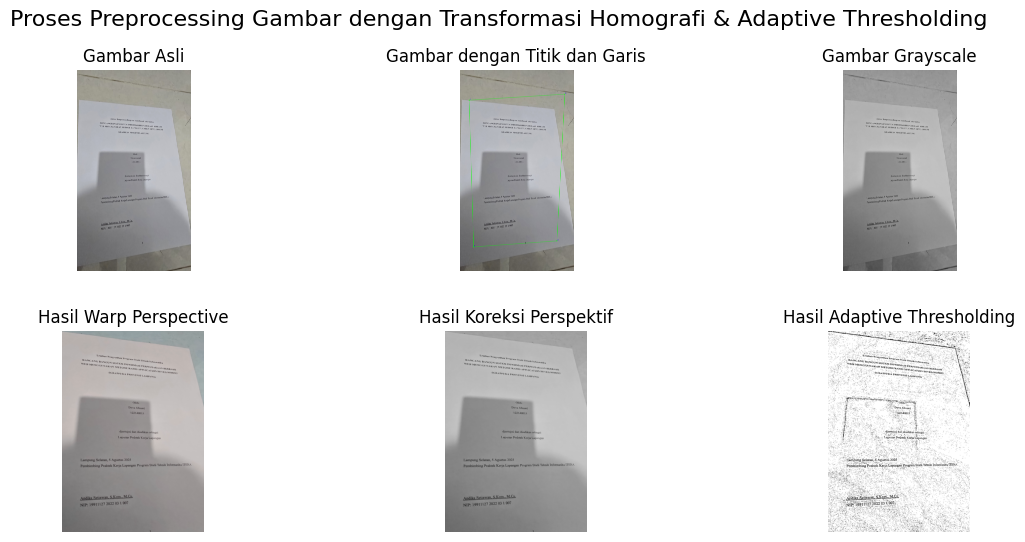

In [75]:
paper_adaptive = cv2.adaptiveThreshold(
    paper_warped_gray,
    255,
    cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
    cv2.THRESH_BINARY,
    11,
    2
)

fig = plt.figure(figsize=(14, 6))
gs = fig.add_gridspec(2, 3, hspace=0.3, wspace=0.2) 
fig.suptitle("Proses Preprocessing Gambar dengan Transformasi Homografi & Adaptive Thresholding", fontsize=16)

# Baris 1
ax1 = fig.add_subplot(gs[0, 0])
ax1.imshow(img_paper_rgb)
ax1.set_title("Gambar Asli")
ax1.axis("off")

ax2 = fig.add_subplot(gs[0, 1])
ax2.imshow(cv2.cvtColor(paper_with_points, cv2.COLOR_BGR2RGB))
ax2.set_title("Gambar dengan Titik dan Garis")
ax2.axis("off")

ax3 = fig.add_subplot(gs[0, 2])
ax3.imshow(gray, cmap='gray')
ax3.set_title("Gambar Grayscale")
ax3.axis("off")

# Baris 2

ax4 = fig.add_subplot(gs[1, 0])
ax4.imshow(paper_warped)
ax4.set_title("Hasil Warp Perspective")
ax4.axis("off")

ax5 = fig.add_subplot(gs[1, 1])
ax5.imshow(paper_warped_gray, cmap='gray')
ax5.set_title("Hasil Koreksi Perspektif")
ax5.axis("off")

ax6 = fig.add_subplot(gs[1, 2])
ax6.imshow(paper_adaptive, cmap='gray')
ax6.set_title("Hasil Adaptive Thresholding")
ax6.axis("off")

### PENJELASAN ###

A. Load Gambar dan Preprocessing  
Proses dimulai dengan membaca img_paper, lalu dilakukan konversi dari BGR ke RGB untuk tampilan yang benar di matplotlib. Selanjutnya gambar diubah ke grayscale untuk menyederhanakan data piksel menjadi satu kanal intensitas cahaya sehingga mempermudah pemrosesan tahap berikutnya.  

B. Transformasi Homografi dan Adaptive Thresholding
Empat titik sudut kertas didefinisikan secara manual sebagai koordinat acuan untuk melakukan transformasi homografi. Titik-titik ini menggambarkan posisi sudut kiri atas, kanan atas, kanan bawah, dan kiri bawah dari dokumen yang terlihat miring di foto. Function cv2.getPerspectiveTransform() menghitung matriks transformasi dari titik sumber (src_points) ke titik tujuan (pts_dst), dan cv2.warpPerspective() menerapkan transformasi tersebut untuk menghasilkan gambar dokumen yang tampak lurus dan sejajar dengan bidang pandang kamera.  
Selain itu, titik acuan dan garis poligon digambar di atas gambar asli menggunakan cv2.circle() dan cv2.polylines() agar kita dapat melihat secara visual posisi keempat titik yang digunakan dalam proses koreksi perspektif. Setelah itu kita lakukan adaptive thresholding menggunakan metode Gaussian melalui fungsi cv2.adaptiveThreshold(). Metode ini sangat efektif untuk kondisi pencahayaan yang tidak merata karena nilai ambang (threshold) disesuaikan secara lokal berdasarkan intensitas di sekitar tiap piksel.

Analisis  
Pada gambar pertama (kiri atas) terlihat citra asli dokumen yang masih memiliki kemiringan serta bayangan yang cukup kuat di bagian bawah kertas. Hal ini membuat tulisan pada dokumen tampak kurang jelas dan tidak sejajar. Pada gambar kedua, dilakukan penentuan empat titik acuan sudut kertas yang ditandai dengan lingkaran hijau dan dihubungkan garis poligon. Keempat titik ini digunakan untuk menghitung matriks homografi agar bentuk kertas dapat diluruskan secara proporsional. Gambar ketiga menampilkan hasil konversi ke grayscale, di mana warna diubah menjadi tingkat intensitas abu-abu untuk menyederhanakan pemrosesan citra.  

Tahap selanjutnya, seperti tampak pada gambar keempat dan kelima, memperlihatkan hasil warp perspective dan koreksi perspektif grayscale. Pada tahap ini, dokumen yang semula miring berhasil diluruskan, menghasilkan tampilan kertas yang sejajar dengan bingkai gambar dan siap diproses lebih lanjut. Meskipun bayangan masih terlihat, posisi dan proporsi kertas sudah presisi menyerupai hasil pemindaian dokumen sebenarnya. Pada gambar terakhir diperlihatkan hasil adaptive thresholding, di mana proses binarisasi diterapkan untuk memisahkan teks dari latar belakang kertas. Metode ini secara otomatis menyesuaikan nilai ambang di setiap area citra, sehingga mampu menampilkan teks dengan kontras tinggi meskipun pencahayaan tidak merata. Secara keseluruhan, tahapan ini berhasil meningkatkan keterbacaan, kerapian, dan keseragaman dokumen yang sebelumnya difoto secara miring dengan pencahayaan kurang ideal.

## REFERENSI ##

### Link Percakapan AI - ChatGPT ###
Tekan [disini](https://chatgpt.com/share/69136e8f-b6c0-800b-8d72-c7b533935bab)

### **Aturan Umum Pengerjaan**

* Kerjakan secara **mandiri**.
* Bantuan AI (seperti ChatGPT, Copilot, dsb.) diperbolehkan **dengan bukti percakapan** (screenshot / link / script percakapan).
* Source code antar mahasiswa harus berbeda.
* Jika mendapat bantuan teman, tuliskan nama dan NIM teman yang membantu.
* Plagiarisme akan dikenakan sanksi sesuai aturan akademik ITERA.
* Cantumkan seluruh **credit dan referensi** yang digunakan di bagian akhir notebook.
* Penjelasan setiap soal ditulis dalam **Markdown**, bukan di dalam komentar kode.

---

### **Aturan Pengumpulan**

* Semua file kerja Anda (notebook `.ipynb`, gambar, dan hasil) **wajib diunggah ke GitHub repository tugas sebelumnya**.

  * Gunakan struktur folder berikut di dalam repo Anda:

    ```
    /Nama_NIM_Repo/ # Nama repo sebelumnya
      ├── assets_ws4/     # berisi semua gambar atau video asli (input)
      ├── results_ws4/    # berisi semua hasil modifikasi dan output
      ├── worksheet4.ipynb
      └── NIM_Worksheet4.pdf
    ```
* File yang dikumpulkan ke **Tally** hanya berupa **hasil PDF** dari notebook Anda, dengan format nama:

  ```
  NIM_Worksheet4.pdf
  ```
* Pastikan notebook telah dijalankan penuh sebelum diekspor ke PDF.
* Sertakan tautan ke repository GitHub Anda di bagian atas notebook atau di halaman pertama PDF.

---

### ✅ **Catatan Akhir**

> Worksheet 4 ini bertujuan mengasah pemahaman Anda tentang manipulasi citra digital secara praktis. Gunakan kreativitas Anda untuk menghasilkan hasil visual yang menarik dan penjelasan konseptual yang jelas.